In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
import zipfile

path = "/gdrive/MyDrive/Journals/Classification of satellite images based on their type of terrain/dataset/dev.zip"
zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

path = "/gdrive/MyDrive/Journals/Classification of satellite images based on their type of terrain/dataset/train.zip"
zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [3]:
import tensorflow as tf

model = tf.keras.models.Sequential([ 
    # First convolution
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Second convolution
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Third convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Fourth convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    # 
    tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [4]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['acc'])

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1/255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory('/tmp/train/', 
                                                    target_size=(128, 128), 
                                                    batch_size=128, 
                                                    class_mode='categorical')

# Flow validation images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory('/tmp/dev/', 
                                                              target_size=(128, 128), 
                                                              batch_size=128, 
                                                              class_mode='categorical',
                                                              shuffle=False)

Found 85290 images belonging to 5 classes.
Found 21323 images belonging to 5 classes.


In [6]:
history = model.fit_generator(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/5
667/667 [==============================] - 96s 126ms/step - loss: 0.3673 - acc: 0.8575 - val_loss: 0.1525 - val_acc: 0.9469
Epoch 2/5
667/667 [==============================] - 79s 119ms/step - loss: 0.1513 - acc: 0.9478 - val_loss: 0.1573 - val_acc: 0.9459
Epoch 3/5
667/667 [==============================] - 78s 117ms/step - loss: 0.1157 - acc: 0.9613 - val_loss: 0.1121 - val_acc: 0.9624
Epoch 4/5
667/667 [==============================] - 78s 117ms/step - loss: 0.1002 - acc: 0.9665 - val_loss: 0.0949 - val_acc: 0.9692
Epoch 5/5
667/667 [==============================] - 79s 119ms/step - loss: 0.0880 - acc: 0.9710 - val_loss: 0.1009 - val_acc: 0.9684


In [7]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

prediction = model.predict_generator(validation_generator, workers=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


In [8]:
print(prediction)

y_pred = np.argmax(prediction, axis=1)
y_test = validation_generator.classes

print(y_test)
print(y_pred)

# Results
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[5.9858775e-01 2.1938126e-01 4.5340350e-03 1.6568391e-01 1.1813027e-02]
 [5.0399756e-01 1.8957494e-01 7.1776641e-04 3.0168301e-01 4.0267119e-03]
 [9.9915648e-01 2.6944515e-04 7.5561270e-06 5.5799331e-04 8.6332448e-06]
 ...
 [5.6191921e-06 1.1766615e-07 2.6490623e-03 4.9297505e-06 9.9734026e-01]
 [7.5822464e-07 6.6747701e-09 1.7345032e-04 2.9179191e-07 9.9982554e-01]
 [2.6347763e-07 2.1683042e-09 5.5495519e-05 9.6540816e-08 9.9994409e-01]]
[0 0 0 ... 4 4 4]
[0 0 0 ... 4 4 4]
[[4811    4   58   82   11]
 [   6 3577    0   33    3]
 [ 100    1 3958   21   20]
 [  45   96  101 3580    9]
 [  13    3   11   56 4724]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4966
           1       0.97      0.99      0.98      3619
           2       0.96      0.97      0.96      4100
           3       0.95      0.93      0.94      3831
           4       0.99      0.98      0.99      4807

    accuracy                           0.97     21323

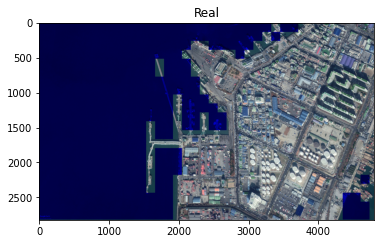

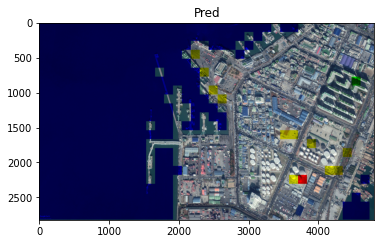

[[409   1  11   1   4]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [ 11   0   0   0 377]]
              precision    recall  f1-score   support

         1.0       0.97      0.96      0.97       426
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0
         5.0       0.99      0.97      0.98       388

    accuracy                           0.97       814
   macro avg       0.39      0.39      0.39       814
weighted avg       0.98      0.97      0.97       814



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


True

In [14]:
# libraries
import numpy as np
# import ctfeatures as ctf
from PIL import Image
from joblib import dump, load
import matplotlib.pyplot as plt

# Load test image
image_name = 'test1'
image_path = '/gdrive/MyDrive/Journals/Classification of satellite images based on their type of terrain/test_images/' + image_name + '.jpg'
map_path = '/gdrive/MyDrive/Journals/Classification of satellite images based on their type of terrain/maps/' + image_name + '.tiff'

image = np.array(Image.open(image_path))
real_copy = np.array(Image.open(image_path))
pred_copy = np.array(Image.open(image_path))
map = np.array(Image.open(map_path))
y_true = map.flatten()

image_height = image.shape[0]
image_width = image.shape[1]

subimage_height = 128 
subimage_width = 128

pred_map = np.zeros(map.shape)

index = 0
classes = {
    "city": 1,
    "forest": 2,
    "mountain": 3,
    "desert": 4,
    "water": 5,
}
for i in range(int(np.floor(image_height / subimage_height))):
        for j in range(int(np.floor(image_width / subimage_width))):
            x_start = i * subimage_height
            x_end = (i + 1) * subimage_height
            y_start = j * subimage_width
            y_end = (j + 1) * subimage_width
            
            if y_true[index] == classes["city"]:
                pass
            elif y_true[index] == classes["desert"]:
                real_copy[x_start:x_end, y_start:y_end, 1] = 0
                real_copy[x_start:x_end, y_start:y_end, 2] = 0
            elif y_true[index] == classes["forest"]:
                real_copy[x_start:x_end, y_start:y_end, 0] = 0
                real_copy[x_start:x_end, y_start:y_end, 2] = 0
            elif y_true[index] == classes["mountain"]:
                real_copy[x_start:x_end, y_start:y_end, 2] = 0
            else:
                real_copy[x_start:x_end, y_start:y_end, 0] = 0
                real_copy[x_start:x_end, y_start:y_end, 1] = 0
            
            index += 1
            
img = plt.imshow(real_copy)
plt.title("Real")
plt.show()

index = 0
y_pred = []
for i in range(int(np.floor(image_height / subimage_height))):
        for j in range(int(np.floor(image_width / subimage_width))):
            x_start = i * subimage_height
            x_end = (i + 1) * subimage_height
            y_start = j * subimage_width
            y_end = (j + 1) * subimage_width

            subimage = np.double(image[x_start:x_end, y_start:y_end, :])/255.0
            subimage = np.expand_dims(np.array(subimage), 0)

            y_probs_temp = model.predict(subimage)
            y_probs = np.hstack((y_probs_temp[:,0], y_probs_temp[:,2], y_probs_temp[:,3], y_probs_temp[:,1], y_probs_temp[:,4]))
            y_pred.append(np.argmax(y_probs)+1)
            
            if y_pred[-1] == classes['city']:
                pred_map[i,j] = 1
            elif y_pred[-1] == classes['desert']:
                pred_copy[x_start:x_end, y_start:y_end, 1] = 0
                pred_copy[x_start:x_end, y_start:y_end, 2] = 0
                pred_map[i,j] = 4
            elif y_pred[-1] == classes['forest']:
                pred_copy[x_start:x_end, y_start:y_end, 0] = 0
                pred_copy[x_start:x_end, y_start:y_end, 2] = 0
                pred_map[i,j] = 2
            elif y_pred[-1] == classes['mountain']:
                pred_copy[x_start:x_end, y_start:y_end, 2] = 0
                pred_map[i,j] = 3
            else:
                pred_copy[x_start:x_end, y_start:y_end, 0] = 0
                pred_copy[x_start:x_end, y_start:y_end, 1] = 0
                pred_map[i,j] = 5
            
            index += 1
            
img = plt.imshow(pred_copy)
plt.title("Pred")
plt.show()
# plt.savefig(image_name + '.jpg', dpi=400)

y_pred = pred_map.flatten()
cm = confusion_matrix(y_true, y_pred)
print(cm)
print(classification_report(y_true,y_pred))

# Save images
import cv2
bgr = cv2.cvtColor(pred_copy, cv2.COLOR_RGB2BGR)
cv2.imwrite(f"/tmp/cnn_{image_name}.png", bgr)